In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

LOAD THE DATASETS


In [2]:
df=pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='latin1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [3]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [4]:
df = df[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]
df.head(20)

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN
5,1970,1,1,United States,Illinois,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment
6,1970,1,2,Uruguay,Montevideo,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,NaN,Tupamaros (Uruguay),Police,Firearms,NaN
7,1970,1,2,United States,California,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,Edes Substation,1/2/1970: Unknown perpetrators detonated explo...,Unknown,Utilities,Explosives,NaN
8,1970,1,2,United States,Wisconsin,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft
9,1970,1,3,United States,Wisconsin,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft


In [5]:
df.shape

(11960, 18)

In [6]:
df.isnull().sum()

Year              0
Month             0
day               0
Country           0
State            42
Region            0
City              0
latitude        390
longitude       390
Attacktype        0
kill           1535
Wound          2865
target1         118
summary       11072
Group             1
Targettype        0
Weapon            1
motive        11337
dtype: int64

In [7]:
df.isnull().sum().sum()


27751

In [8]:
df['Wound'] = df['Wound'].fillna(0)
df['kill'] = df['kill'].fillna(0)
df['Casualities'] = df['kill'] + df['Wound']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11960 entries, 0 to 11959
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         11960 non-null  int64  
 1   Month        11960 non-null  int64  
 2   day          11960 non-null  int64  
 3   Country      11960 non-null  object 
 4   State        11918 non-null  object 
 5   Region       11960 non-null  object 
 6   City         11960 non-null  object 
 7   latitude     11570 non-null  float64
 8   longitude    11570 non-null  float64
 9   Attacktype   11960 non-null  object 
 10  kill         11960 non-null  float64
 11  Wound        11960 non-null  float64
 12  target1      11842 non-null  object 
 13  summary      888 non-null    object 
 14  Group        11959 non-null  object 
 15  Targettype   11960 non-null  object 
 16  Weapon       11959 non-null  object 
 17  motive       623 non-null    object 
 18  Casualities  11960 non-null  float64
dtypes: f

Describing the Dataset


In [9]:
df.describe()

,Year,Month,day,latitude,longitude,kill,Wound,Casualities
count,11960.000000,11960.000000,11960.000000,11570.000000,11570.000000,11960.000000,11960.000000,11960.000000
mean,1976.726338,6.170569,15.243227,31.330726,-22.842727,0.879097,0.934783,1.813880
std,3.024931,3.338024,8.942614,22.026742,54.525074,5.929225,6.850653,9.788078
min,1970.000000,0.000000,0.000000,-45.867889,-157.818968,0.000000,0.000000,0.000000
25%,1975.000000,3.000000,8.000000,14.622869,-75.416953,0.000000,0.000000,0.000000
50%,1978.000000,6.000000,15.000000,39.930771,-5.956210,0.000000,0.000000,0.000000
75%,1979.000000,9.000000,23.000000,45.434336,11.346518,1.000000,0.000000,1.000000
max,1980.000000,12.000000,31.000000,64.837778,172.636225,422.000000,285.000000,422.000000


Correlation and Heatmap

In [10]:
df.corr()

,Year,Month,day,latitude,longitude,kill,Wound,Casualities
Year,1.000000,-0.087689,-0.004167,-0.188417,0.125829,0.040110,0.034079,0.048149
Month,-0.087689,1.000000,-0.001244,-0.006958,-0.007068,0.008110,0.009555,0.011600
day,-0.004167,-0.001244,1.000000,0.013356,0.014520,0.001487,0.003516,0.003361
latitude,-0.188417,-0.006958,0.013356,1.000000,0.322410,-0.037512,-0.007309,-0.027819
longitude,0.125829,-0.007068,0.014520,0.322410,1.000000,0.016347,0.088871,0.072125
kill,0.040110,0.008110,0.001487,-0.037512,0.016347,1.000000,0.168878,0.723957
Wound,0.034079,0.009555,0.003516,-0.007309,0.088871,0.168878,1.000000,0.802197
Casualities,0.048149,0.011600,0.003361,-0.027819,0.072125,0.723957,0.802197,1.000000


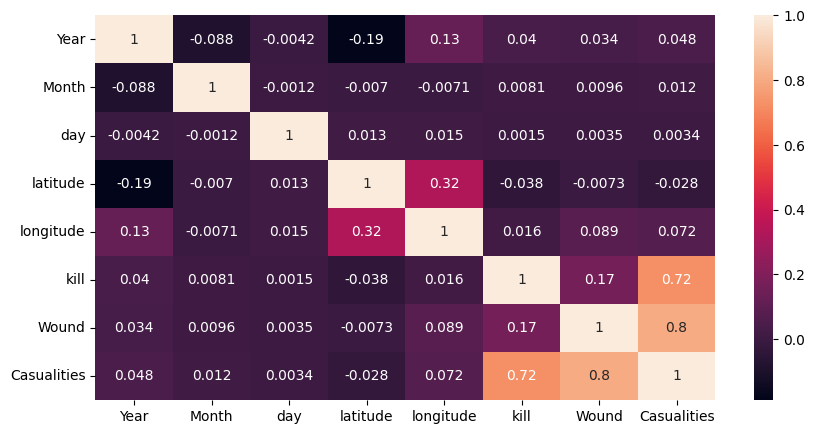

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [12]:
#Performing Some Data Visualizations:

In [13]:
df['Year'].value_counts(dropna = False).sort_index()

1970     651
1971     471
1972     568
1973     473
1974     581
1975     740
1976     923
1977    1319
1978    1526
1979    2662
1980    2046
Name: Year, dtype: int64

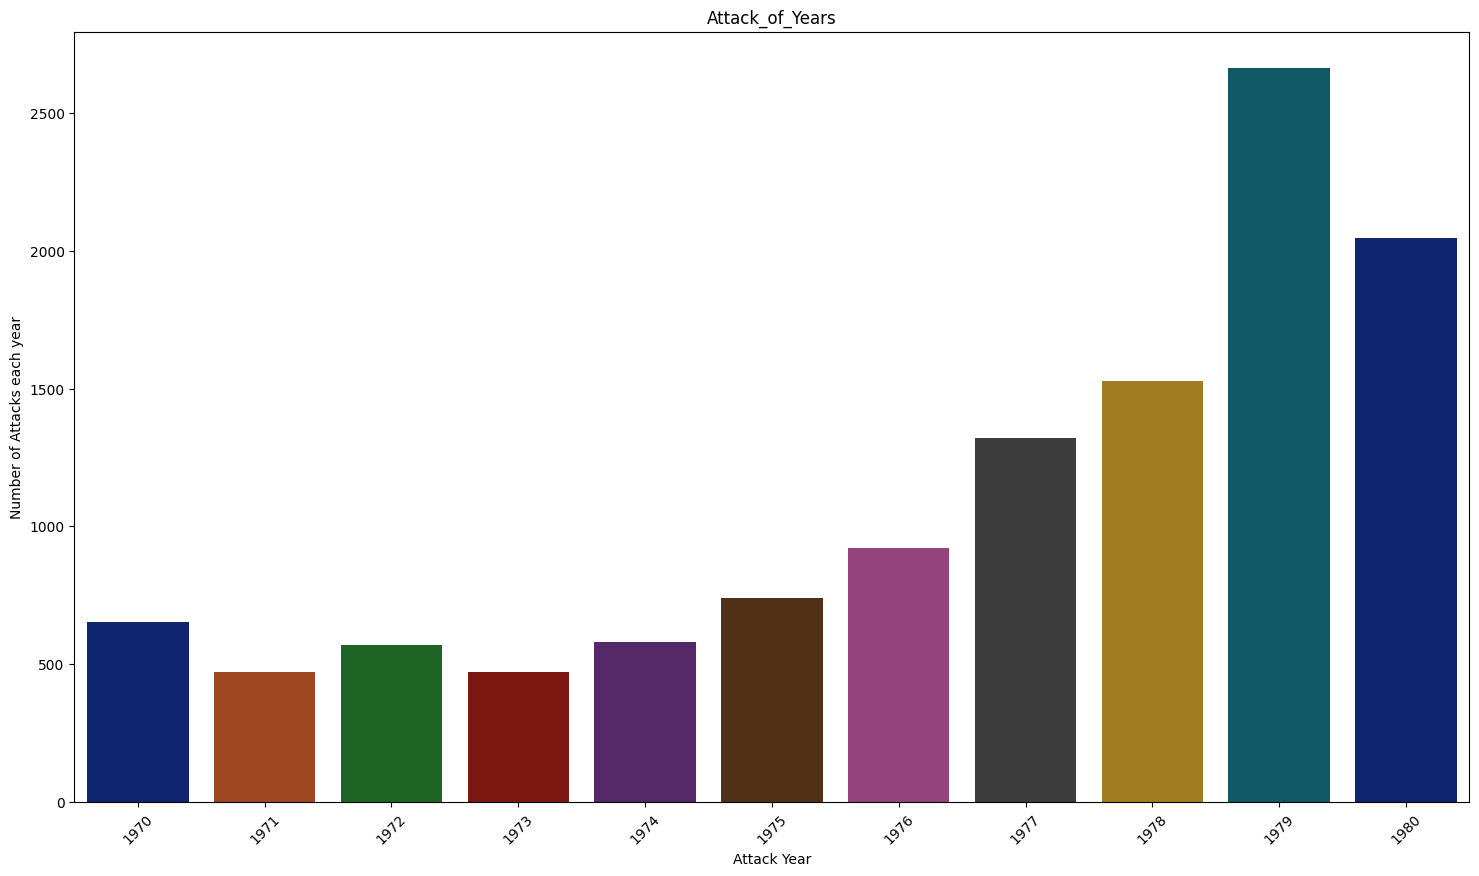

In [14]:
x_year = df['Year'].unique()
y_count_years = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'dark')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

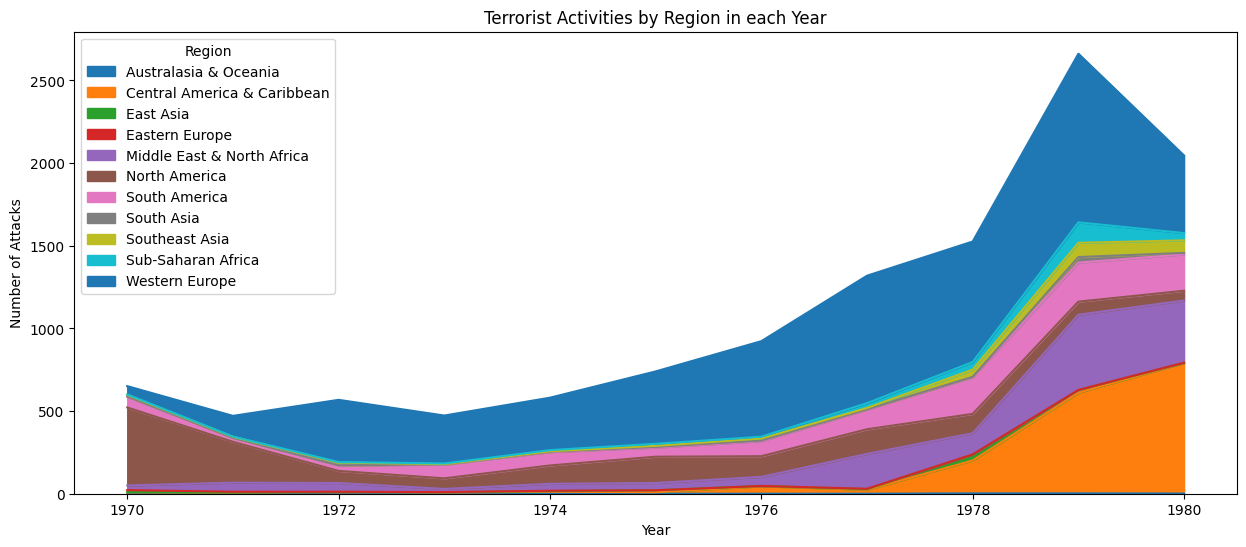

In [15]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

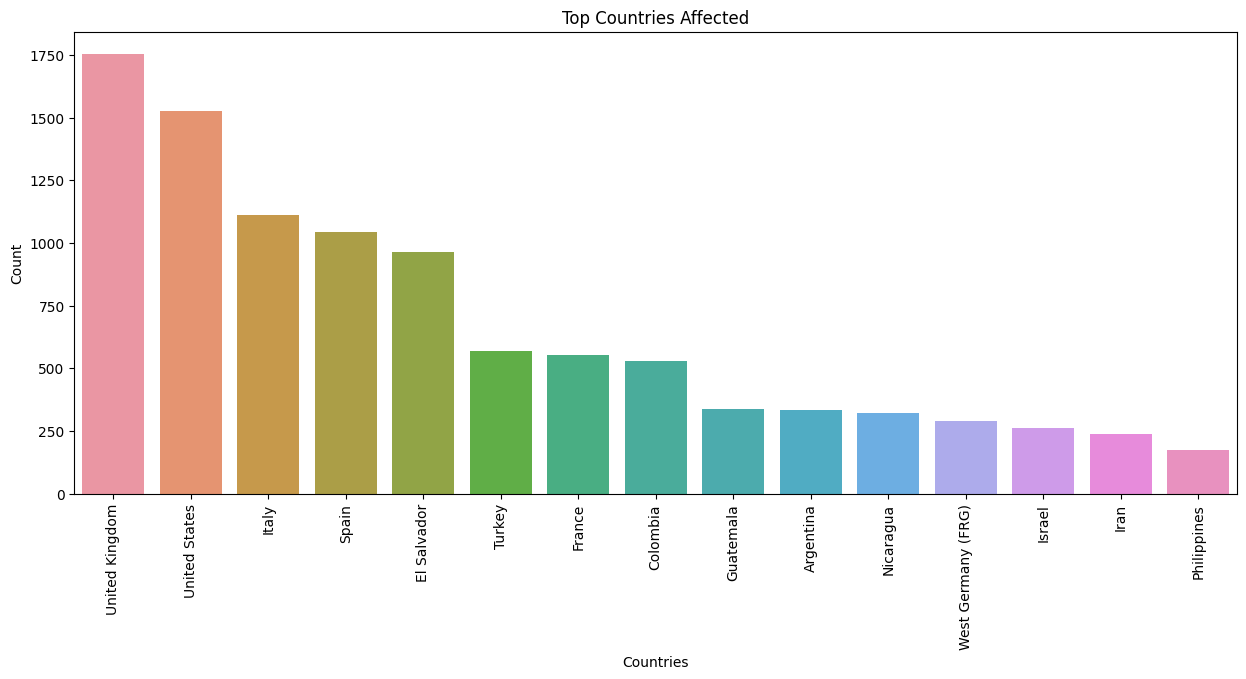

In [16]:
plt.figure(figsize=(15,6))
sns.barplot(x=df['Country'].value_counts()[:15].index, y=df['Country'].value_counts()[:15].values)
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'Casualities')

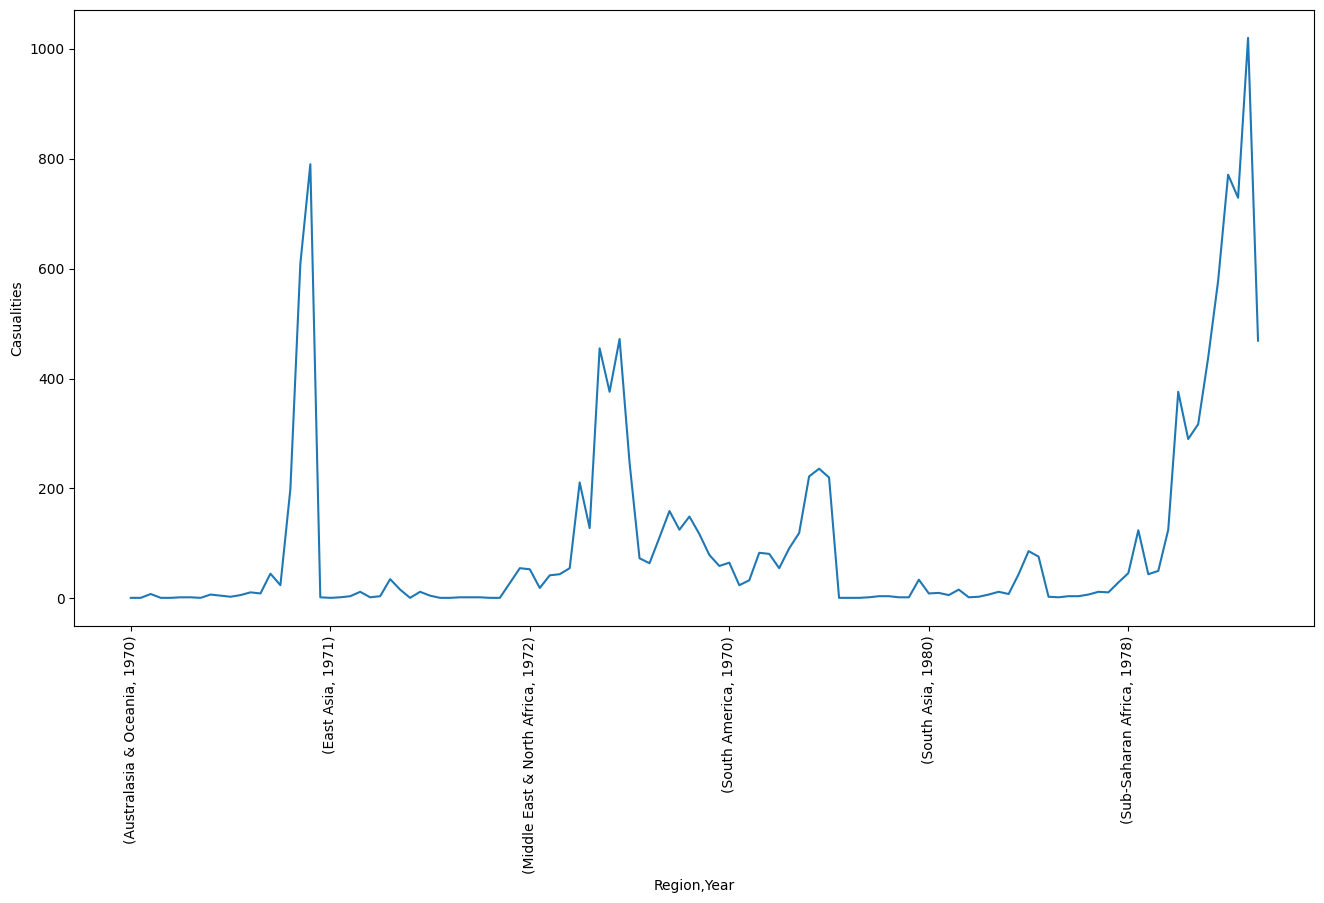

In [17]:
plt.subplots(figsize=(16,8))
df.groupby(['Region', 'Year']).count()['Casualities'].plot()
plt.xticks(rotation=90)
plt.ylabel("Casualities")

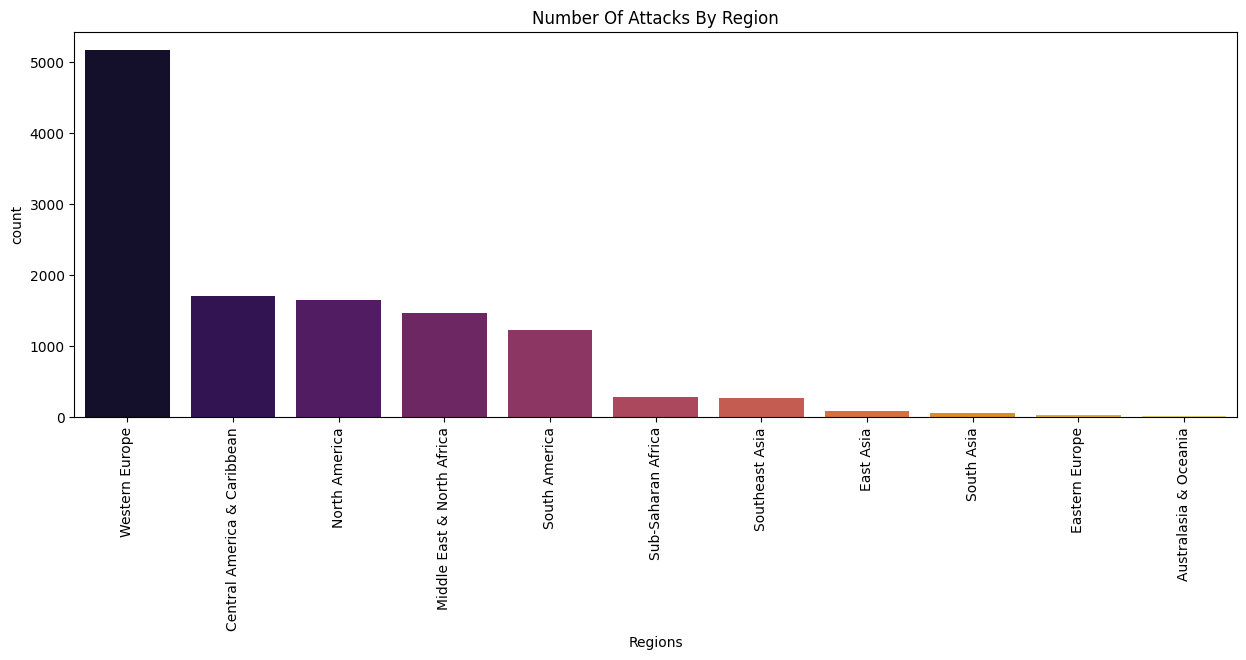

In [18]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x='Region', data=df, palette='inferno', order=df['Region'].value_counts().index, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Regions')
ax.set_title('Number Of Attacks By Region')
plt.show()

In [19]:
Weapon_data = df['Weapon'].value_counts()
Weapon_data

Explosives                                                                     5239
Firearms                                                                       3876
Incendiary                                                                     1439
Unknown                                                                        1261
Melee                                                                            90
Chemical                                                                         35
Other                                                                             6
Sabotage Equipment                                                                5
Fake Weapons                                                                      4
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)       2
Radiological                                                                      2
Name: Weapon, dtype: int64

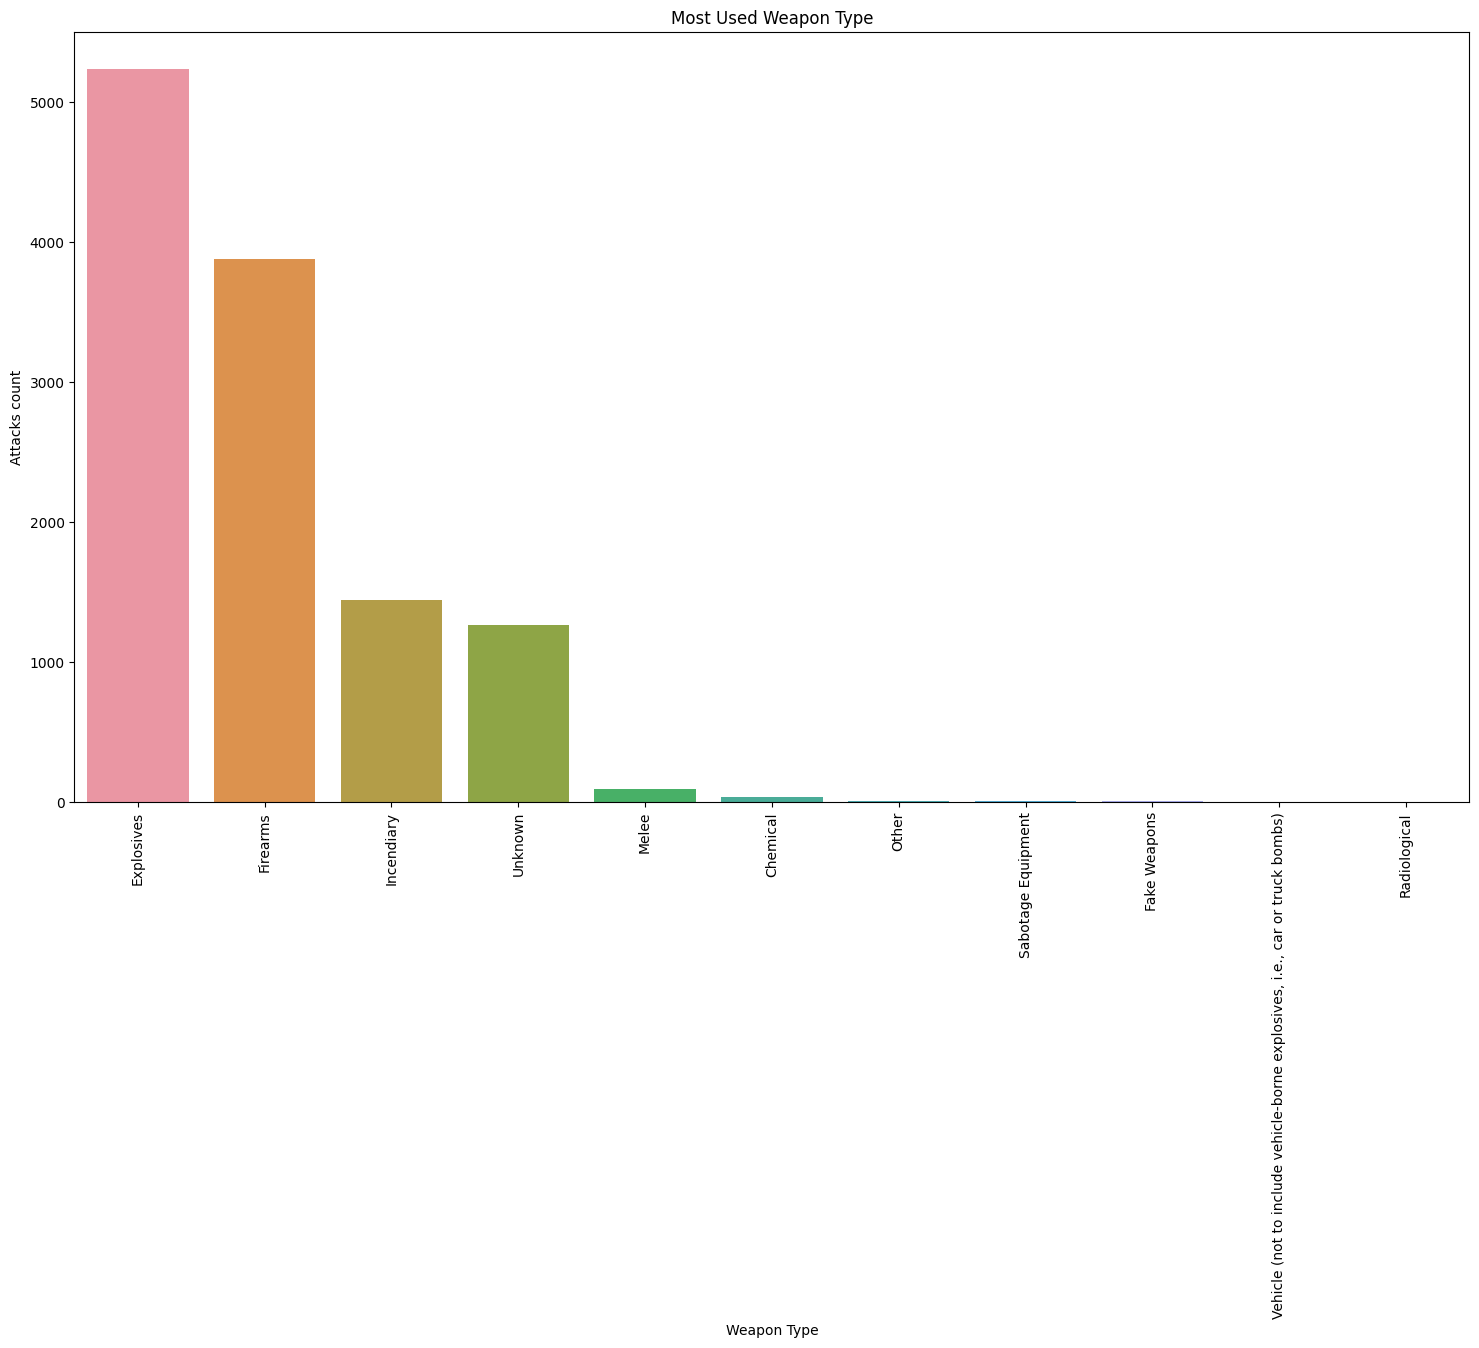

In [20]:
plt.figure(figsize= (18,10))
sns.barplot(x = Weapon_data.index , y = Weapon_data.values)
plt.title('Most Used Weapon Type')
plt.xlabel('Weapon Type')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

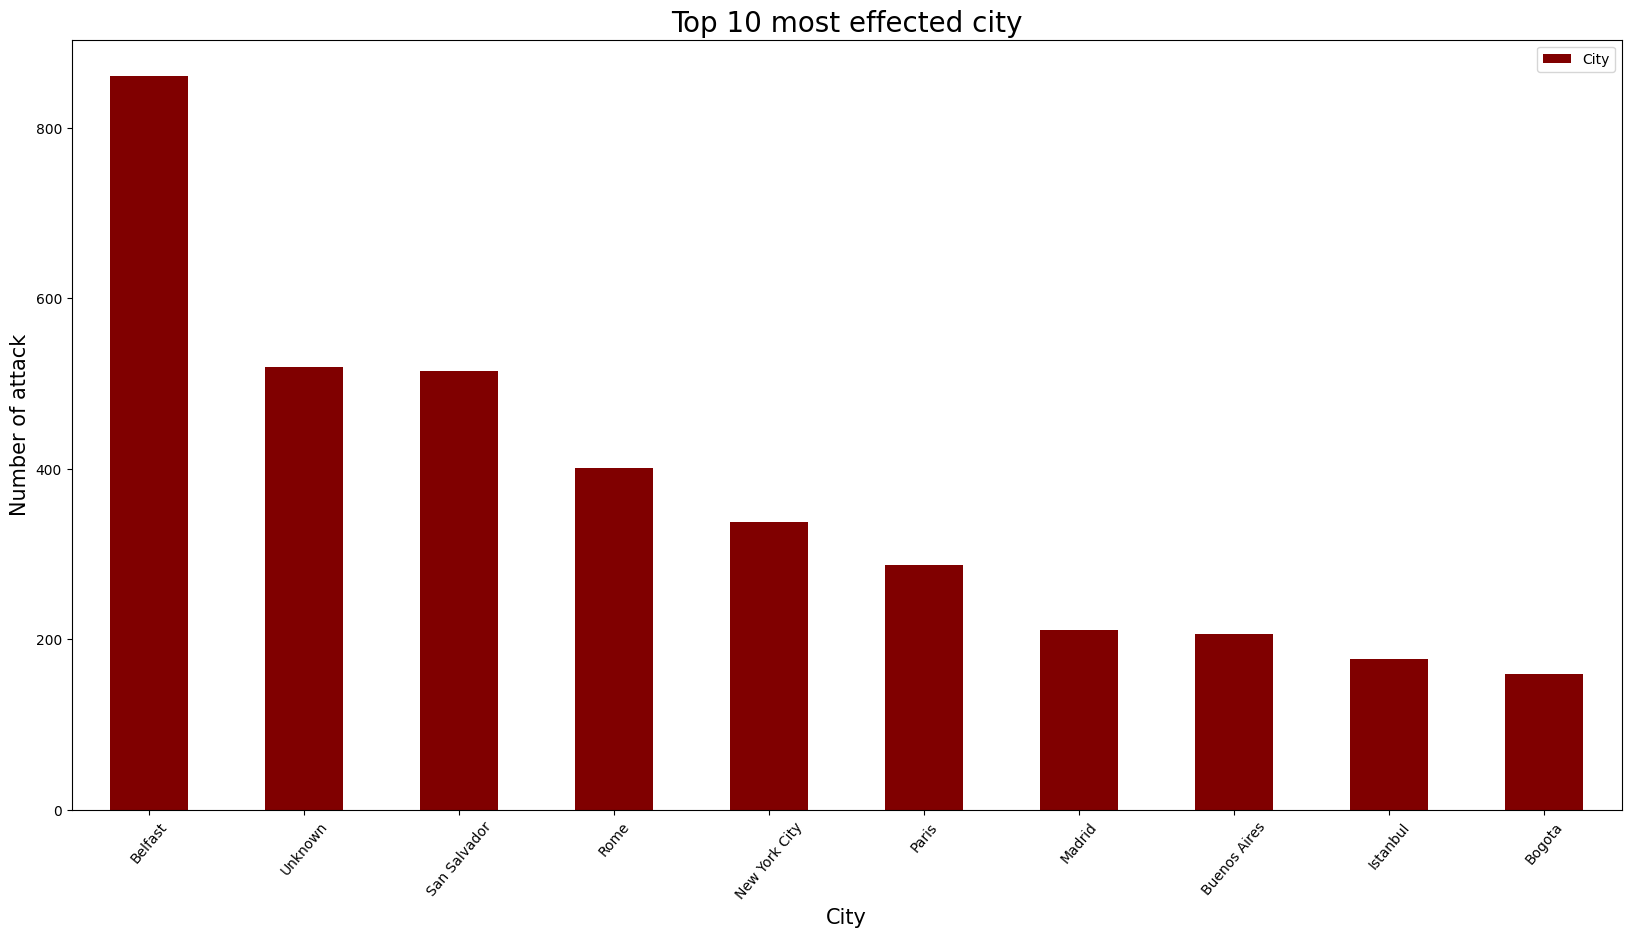

In [21]:
df['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color=['maroon'])
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 most effected city",fontsize=20)
plt.show()

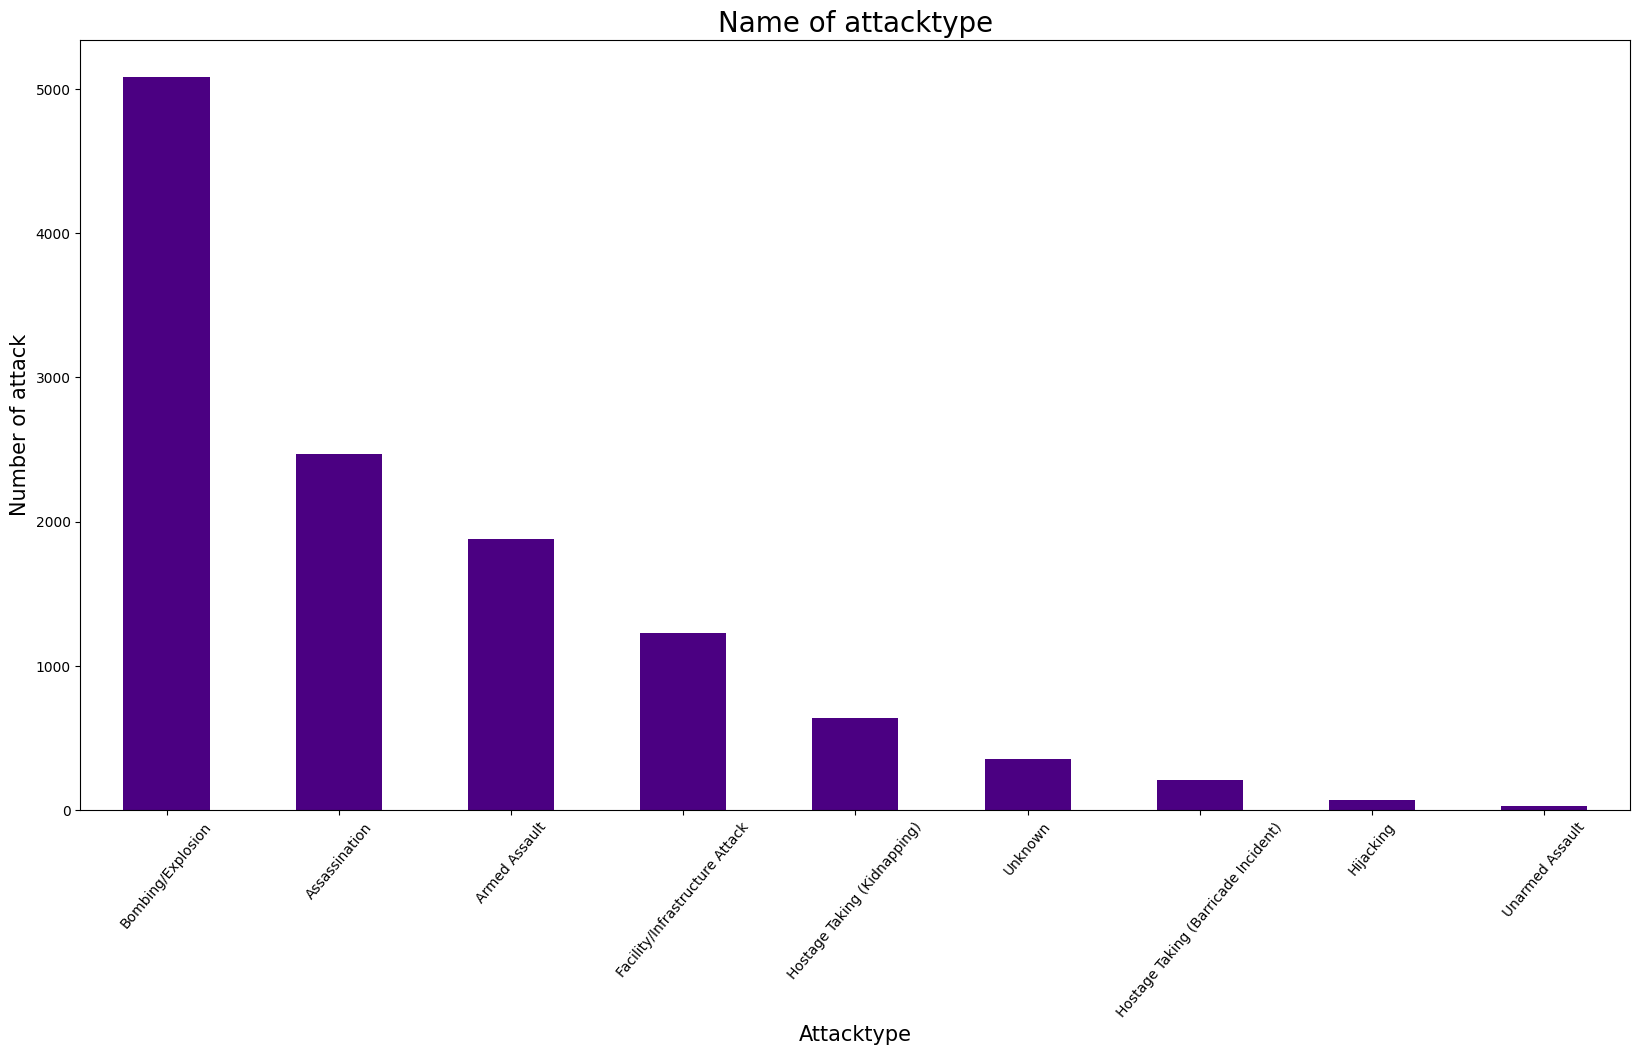

In [22]:
df['Attacktype'].value_counts().plot(kind='bar',figsize=(20,10),color='indigo')
plt.xticks(rotation = 50)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Name of attacktype",fontsize=20)
plt.show()

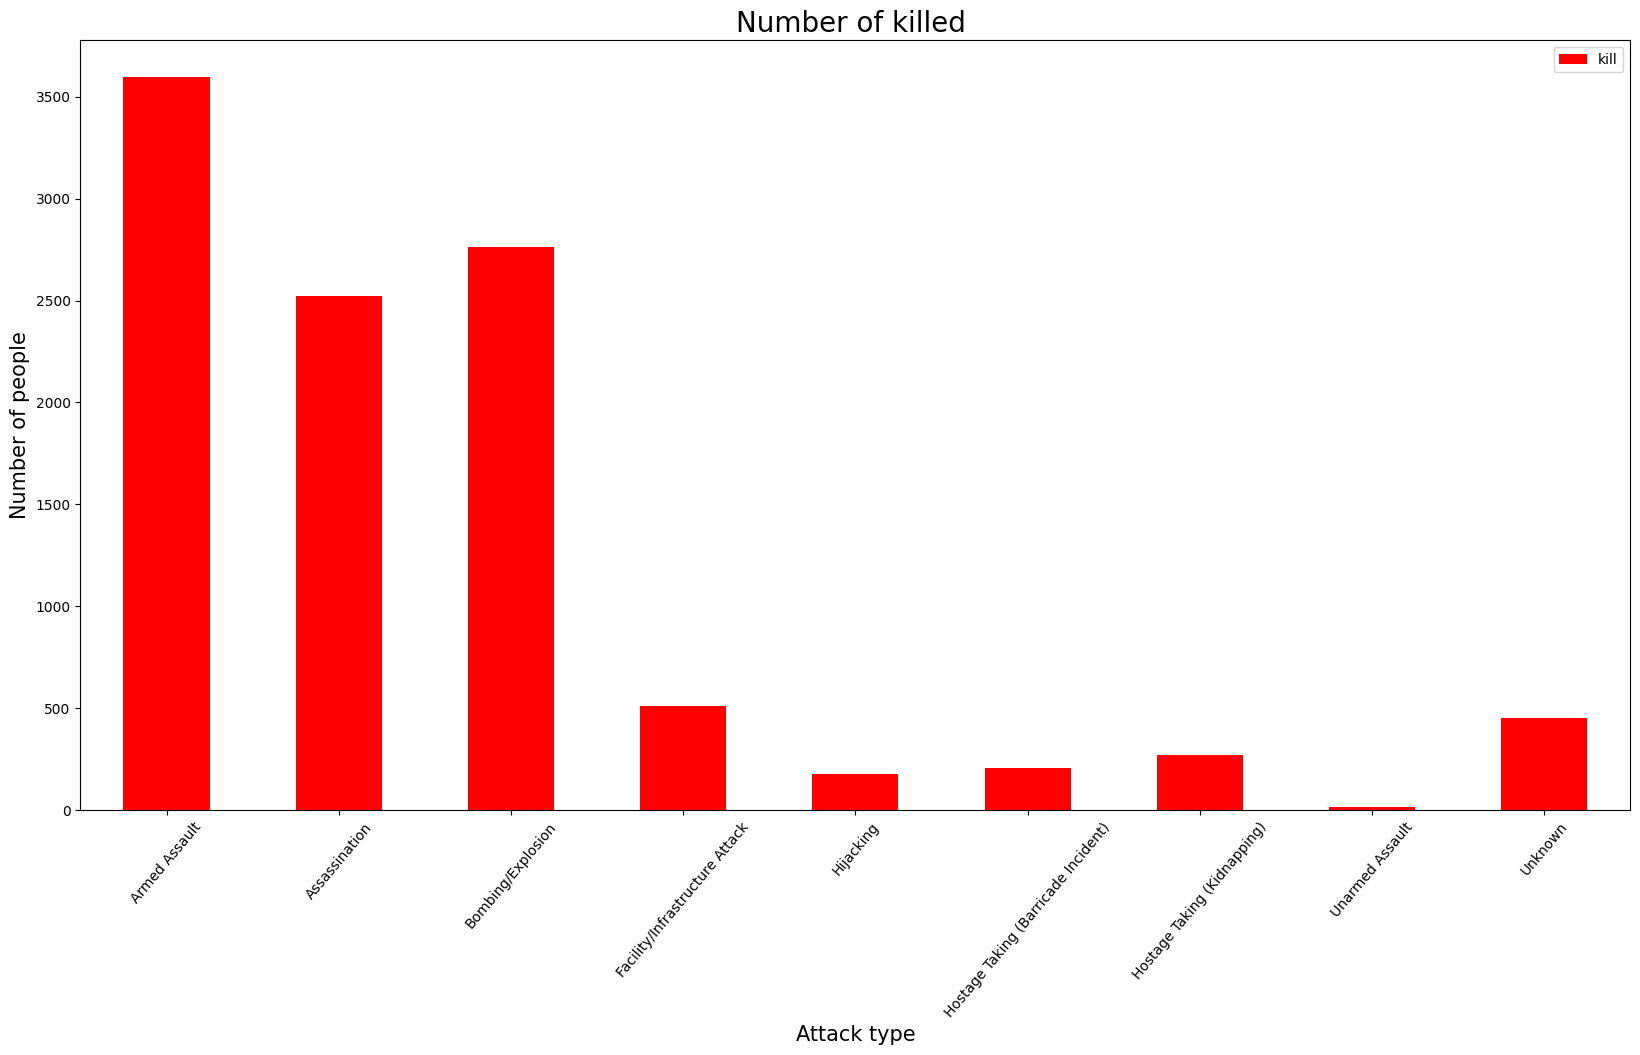

In [23]:
df[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['red'])
plt.xticks(rotation=50)
plt.title("Number of killed ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

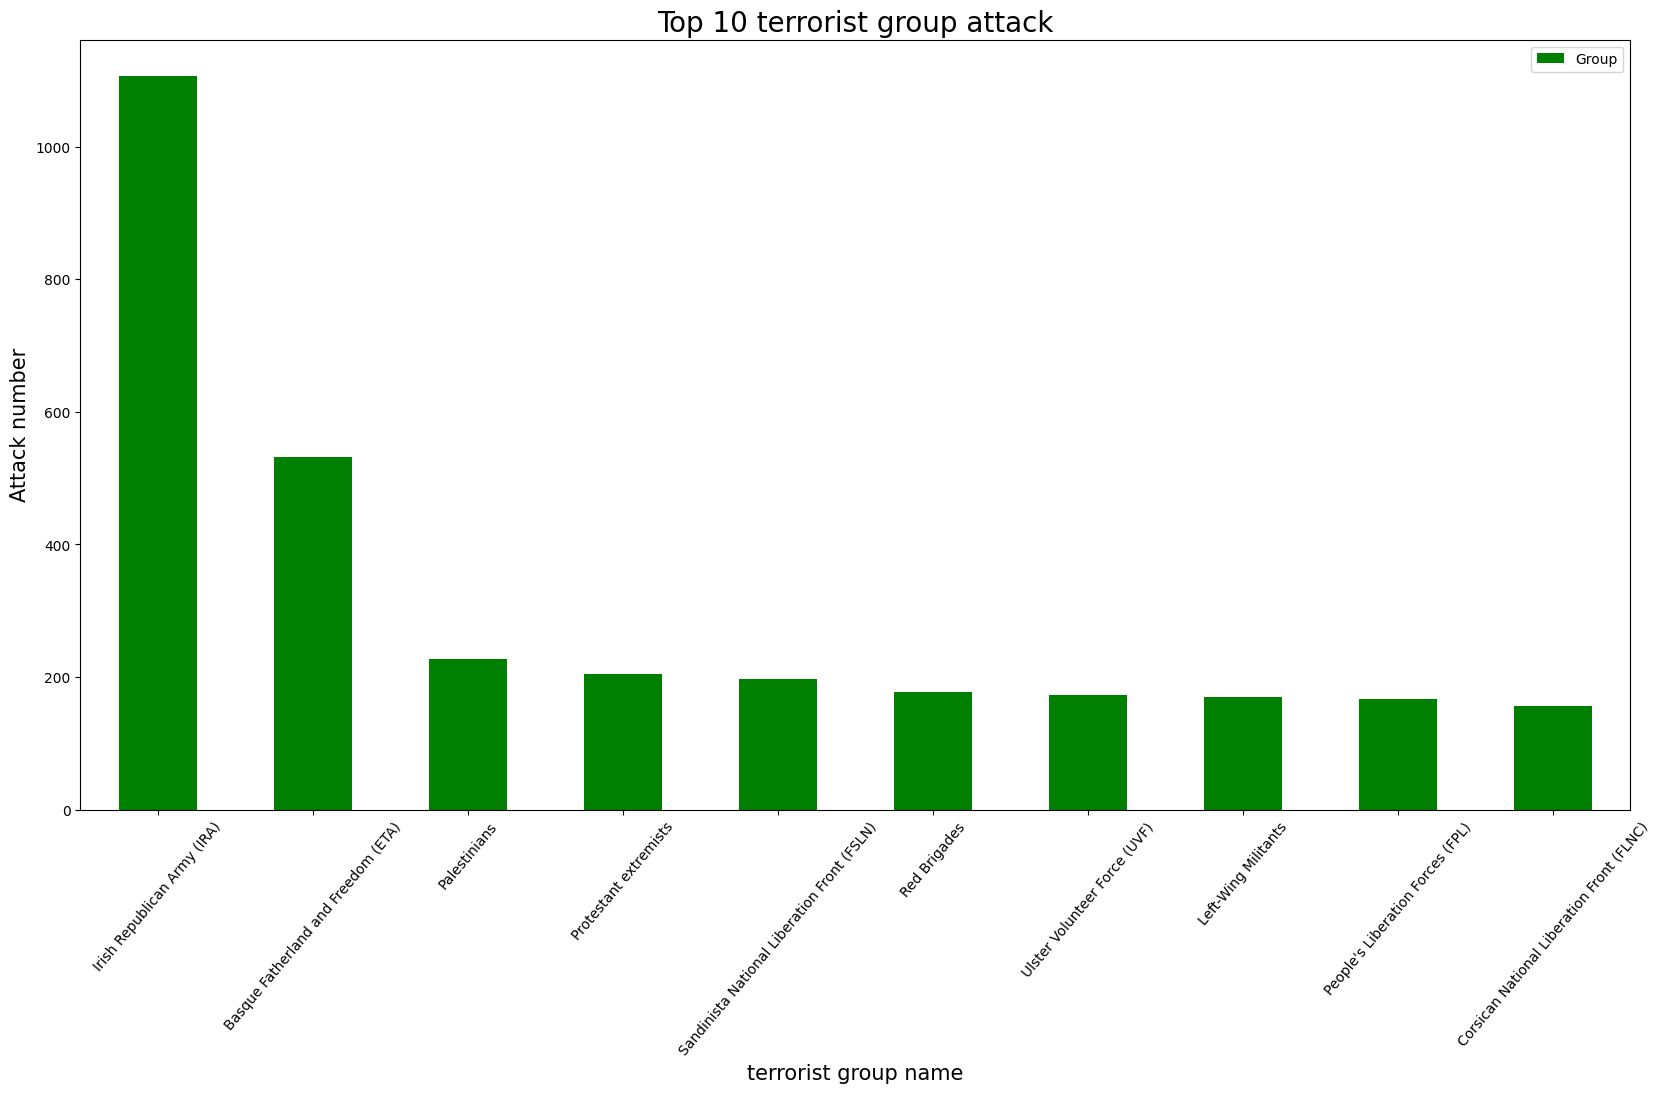

In [24]:
df['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='green',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.xticks(rotation=50)
plt.ylabel("Attack number",fontsize=15)
plt.show()

In [25]:
Target_data = df['Targettype'].value_counts().nlargest(n=15)
Target_data

Business                          2904
Private Citizens & Property       1876
Government (General)              1580
Military                          1252
Police                            1216
Government (Diplomatic)            765
Journalists & Media                376
Educational Institution            363
Transportation                     339
Airports & Aircraft                337
Utilities                          205
Terrorists/Non-State Militia       154
Religious Figures/Institutions     148
Unknown                            136
Telecommunication                   80
Name: Targettype, dtype: int64

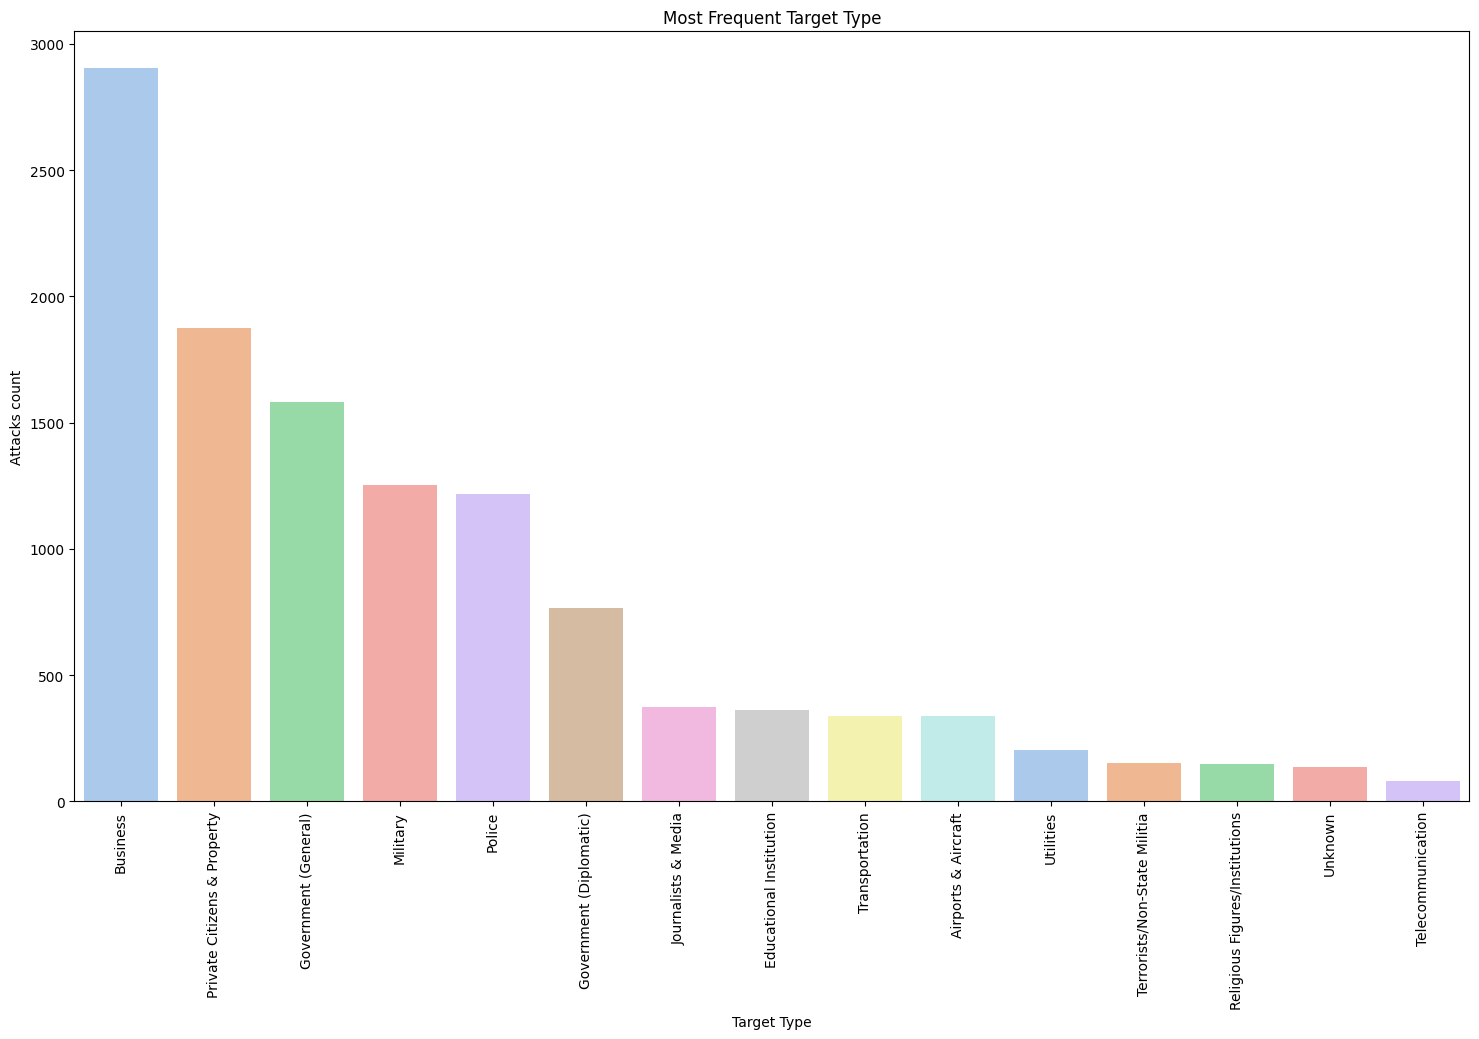

In [26]:
plt.figure(figsize= (18,10))
sns.barplot(x = Target_data.index , y = Target_data.values,palette='pastel')
plt.title('Most Frequent Target Type')
plt.xlabel('Target Type')
plt.xticks(rotation=50)
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()


In [27]:
df=df[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df

,Group,Country,kill
0,Irish Republican Army (IRA),United Kingdom,1027.0
1,Farabundo Marti National Liberation Front (FMLN),El Salvador,466.0
2,Mujahedin-e Khalq (MEK),Iran,449.0
3,Moro National Liberation Front (MNLF),Philippines,302.0
4,Basque Fatherland and Freedom (ETA),Spain,269.0
5,Ulster Volunteer Force (UVF),United Kingdom,247.0
6,Sandinista National Liberation Front (FSLN),Nicaragua,238.0
7,Protestant extremists,United Kingdom,232.0
8,Montoneros (Argentina),Argentina,212.0
9,Revolutionary Armed Forces of Colombia (FARC),Colombia,207.0


In [28]:
kill = df.loc[:,'kill']
print('Number of people killed by terror attack:', int(sum(kill.dropna())))

Number of people killed by terror attack: 3649


In [29]:
CountryKill = df.pivot_table(columns='Country', values='kill', aggfunc='sum')
CountryKill

Country,Argentina,Colombia,El Salvador,Iran,Nicaragua,Philippines,Spain,United Kingdom
kill,212.0,207.0,466.0,449.0,238.0,302.0,269.0,1506.0
